In [1]:
import os
from utils import Utils
import binvox_rw

class Config:
    DATA_BASE_DIR = "data"
    OBJ_FORMAT = ".obj"
    BINVOX_FORMAT = ".binvox"
    
    BINVOX_RESOLUTION = 36
    
class Preprocessor(Config, Utils):
    def preprocess(self):
        for data_name in os.listdir(self.DATA_BASE_DIR):
            each_obj_data_path = os.path.join(self.DATA_BASE_DIR, data_name, data_name + self.OBJ_FORMAT)
            self.mesh_to_binvox(path=each_obj_data_path, resolution=self.BINVOX_RESOLUTION, normalize=True, overwrite=True)
            
            each_binvox_data_path = each_obj_data_path.replace(self.OBJ_FORMAT, f"_norm{self.BINVOX_FORMAT}")
            with open(each_binvox_data_path, 'rb') as f:
                model = binvox_rw.read_as_3d_array(f)
                self.plot_binvox(data=model.data, plot_voxels=True, map_y_to_z=True, title=data_name)

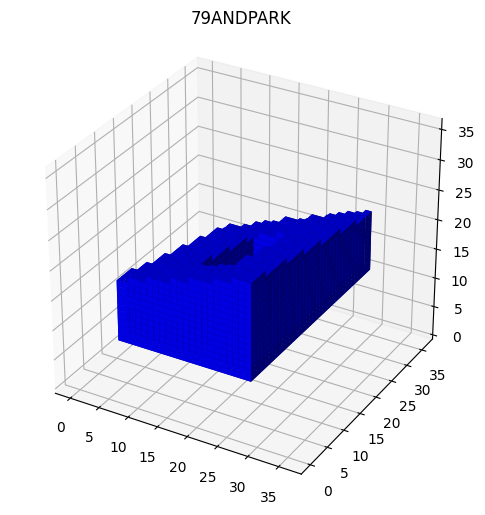

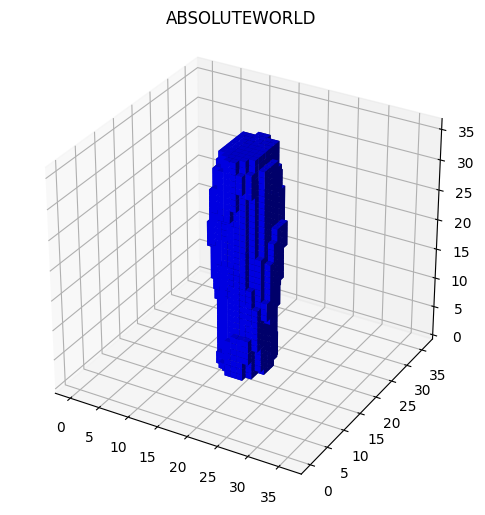

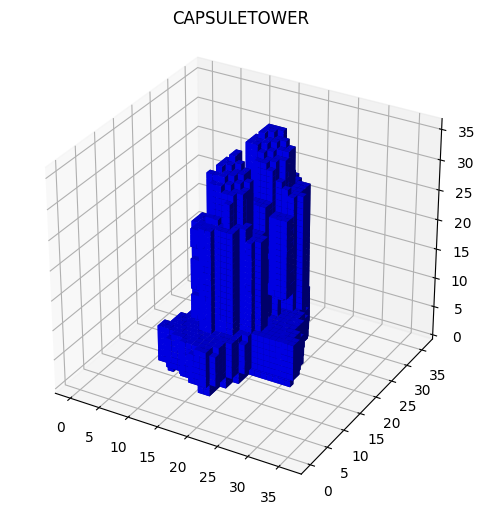

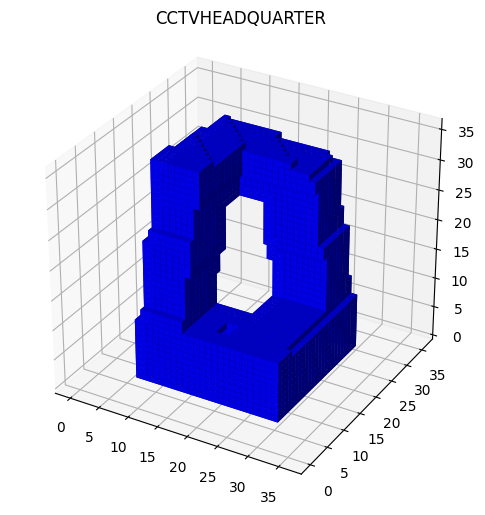

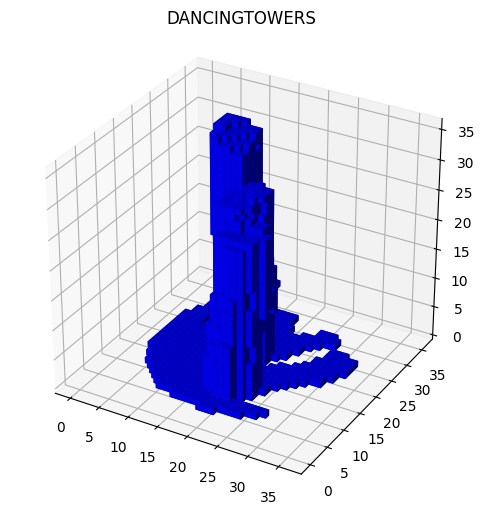

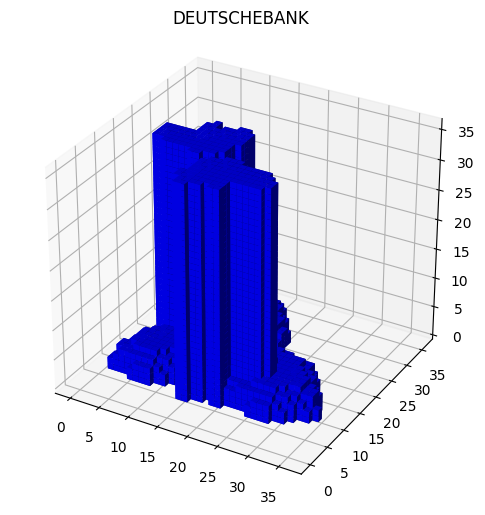

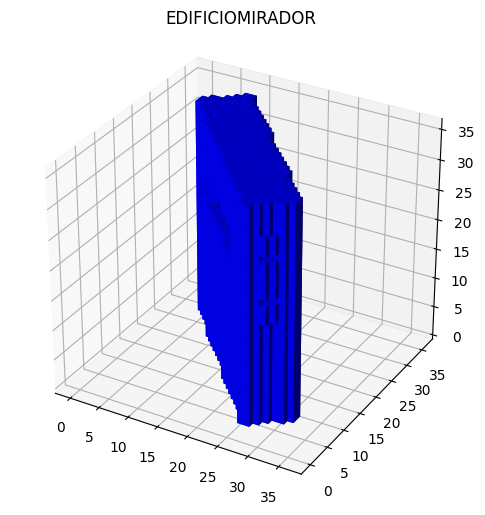

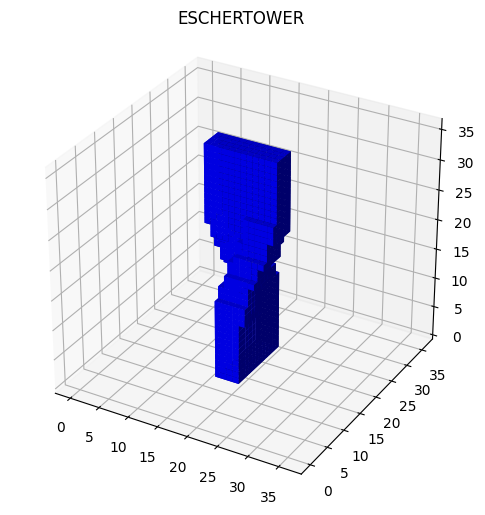

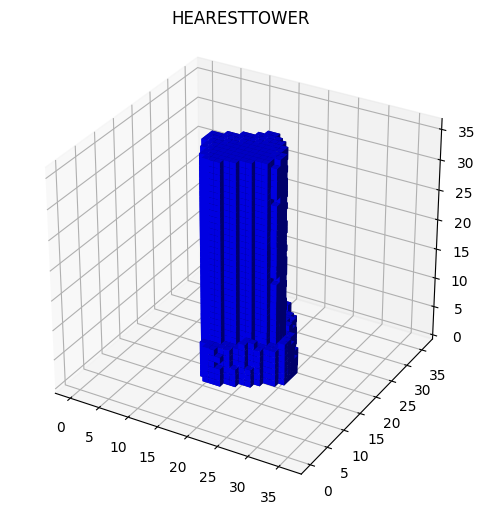

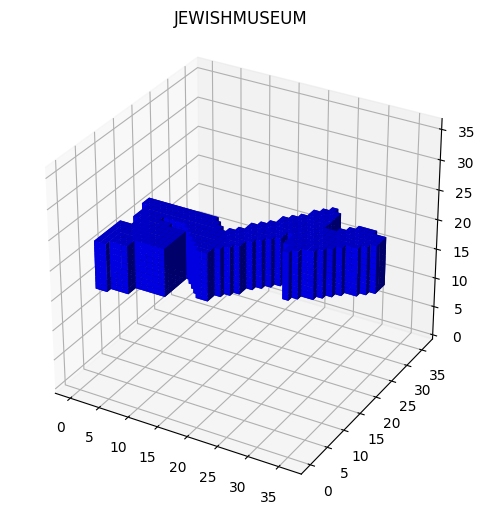

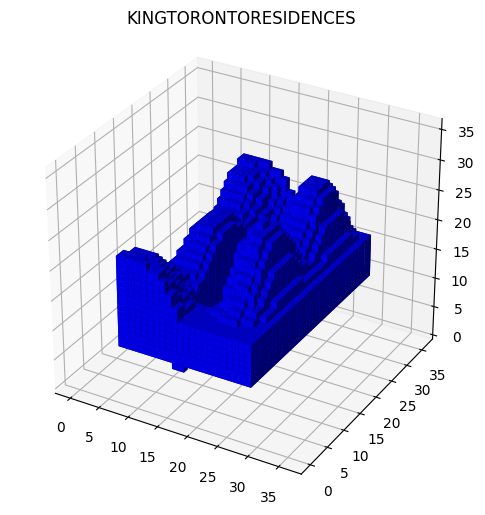

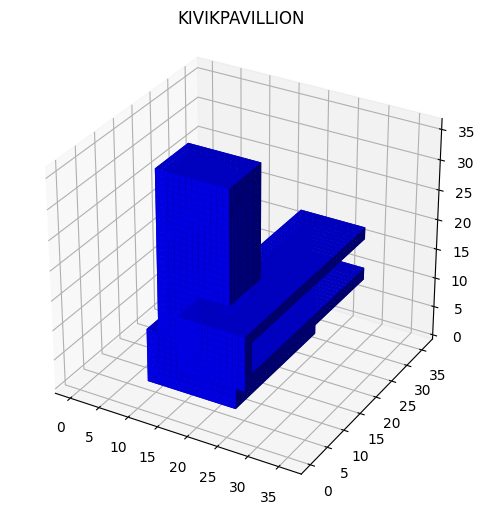

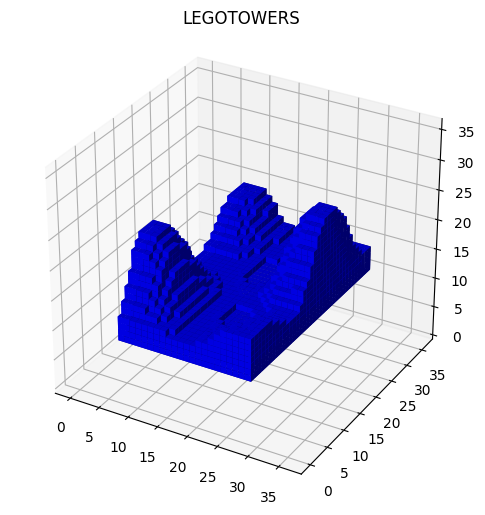

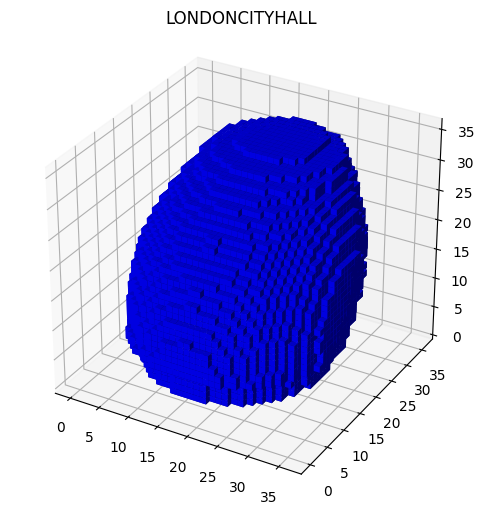

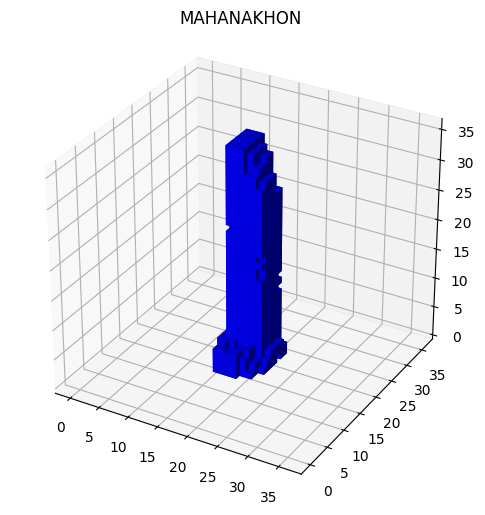

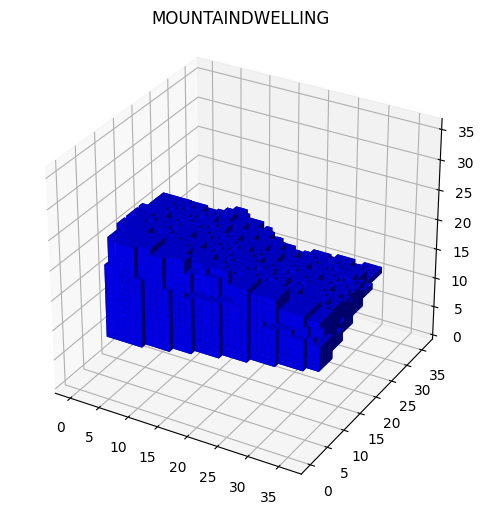

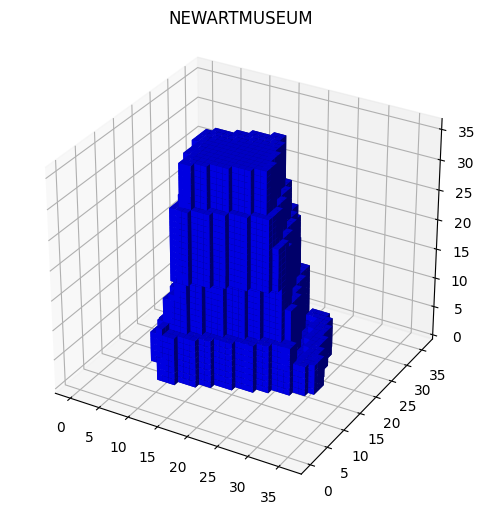

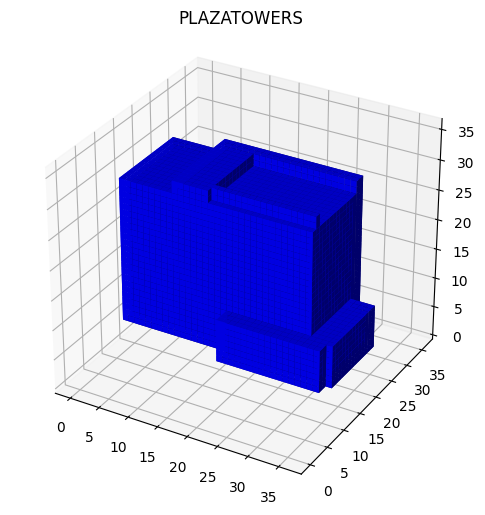

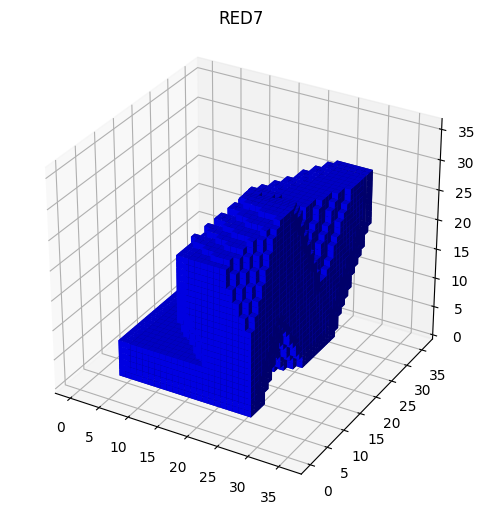

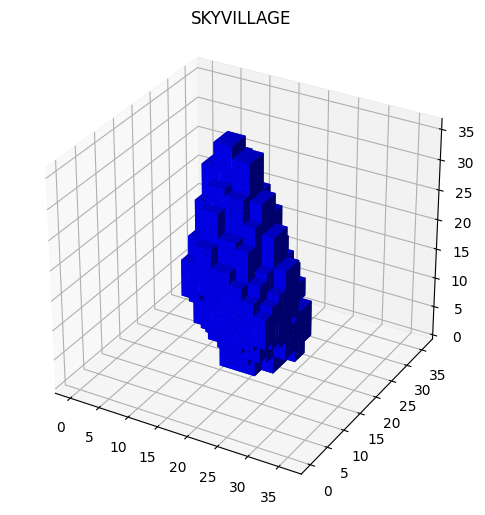

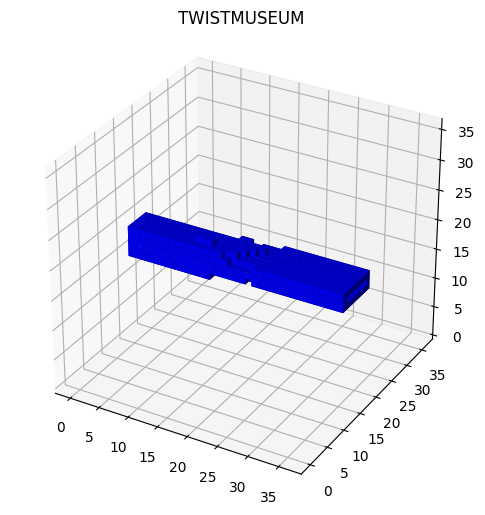

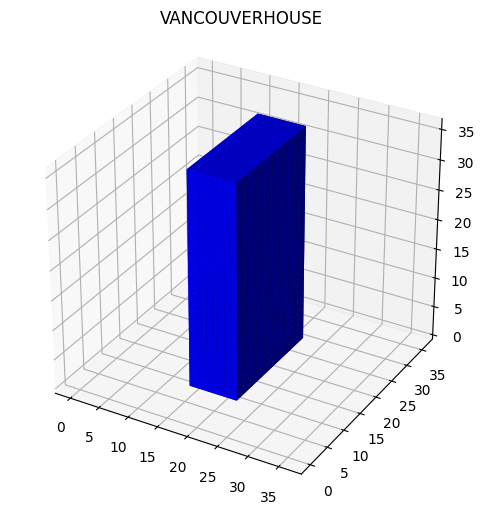

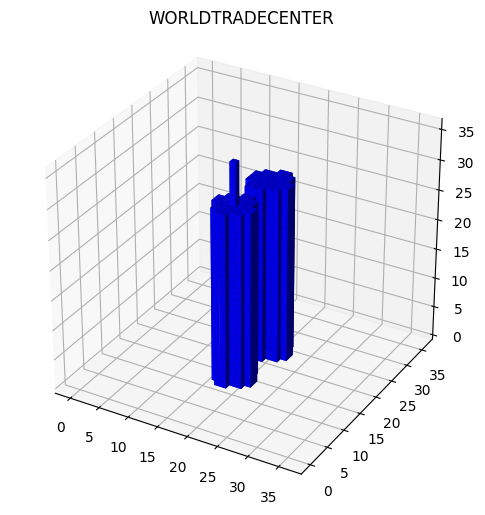

In [2]:
preprocessor = Preprocessor()
preprocessor.preprocess()

In [18]:
import trimesh
import os
import numpy as np

path = "data\RED7\RED7_norm.obj"
mesh = trimesh.load(path)

# Define a rotation axis and angle (in radians)
axis = [0, 1, 0]  # This will rotate around the Y-axis
angle = np.radians(180)  # Rotate by 45 degrees

# Get a rotation matrix
rotation_matrix = trimesh.transformations.rotation_matrix(angle, axis)

# Apply the rotation to the mesh
mesh.apply_transform(rotation_matrix)
mesh.export('rotated_mesh.obj')


norm_path = path.replace(".obj", "_norm.obj")
mesh.export(norm_path)

# if overwrite:
#     binvox_path = f'{norm_path.replace("obj", "binvox")}'
#     if os.path.exists(binvox_path):
#         os.remove(binvox_path)

command = f"binvox -cb -e -d {32} {norm_path}"
os.system(command)


0

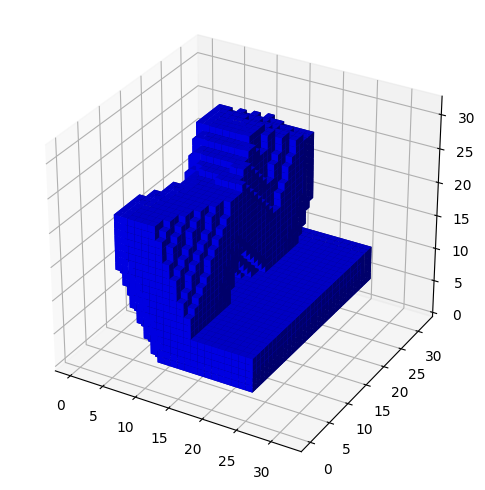

In [19]:
with open("data\RED7\RED7_norm_norm.binvox", "rb") as fp:
    model = binvox_rw.read_as_3d_array(fp)
    Utils.plot_binvox(data=model.data, map_y_to_z=True, plot_voxels=True)

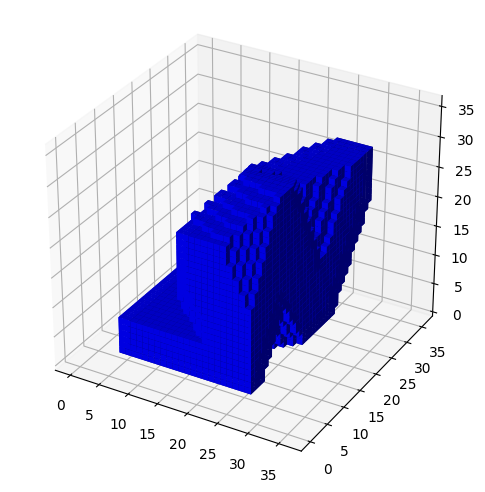

In [7]:
import binvox_rw
from utils import Utils

import numpy as np

from scipy.ndimage import rotate

with open("data\RED7\RED7_norm.binvox", "rb") as fp:
    model = binvox_rw.read_as_3d_array(fp)
    Utils.plot_binvox(data=model.data, map_y_to_z=True, plot_voxels=True)

In [ ]:
"""
    The next steps:
        - Reference 
            . https://chat.openai.com/c/ea93f553-4045-48a8-89b8-39b6c4b64d06
            
        - Data Augmentation
            . Mirrored binvox array
            . Rotated binvox array
"""